<a href="https://colab.research.google.com/github/ch3rnoalpha/Sales_predictions---john-paredes/blob/main/Project_core_1_John_paredes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project core 2

John paredes

In [2]:
#imports drive and mounts it
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#imports pandas as 'pd'
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
###################################################
# ML imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

In [10]:
#sets filepath as file name and creates dataframe
filename = '/content/drive/MyDrive/CodingDojo/Data files/sales_predictions.csv'
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
#drops na data
df.dropna(inplace = True)

In [ ]:
#shows the shape of the dataframe
df.shape

In [ ]:
#shows data types
df.dtypes

In [ ]:
#drops duplicates
df.drop_duplicates(subset =["Item_Identifier"], keep ='last', inplace = True)
df

In [ ]:
#shows thats null
df.isnull().sum()

In [ ]:
################################################################################################################################
#Beginning of train test split

In [18]:
#sets train and test data values
X = df.drop(columns='Item_Outlet_Sales')
y = df['Item_Outlet_Sales']

In [19]:
#test size is percentage
X_train, X_test, Y_train, y_test = train_test_split(X,y,random_state= 42, test_size=.3)

In [20]:
#seperates and selects number and object colums
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')

In [21]:
#gives our scaling and encoding functions an easier variable to call, with set arguments
scaler = StandardScaler()
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [22]:
#creates tuples with data thats being passed through our scaler/encoder
num_tuple = (scaler,num_selector)
cat_tuple = (encoder, cat_selector)

In [25]:
#instatiates transformer
transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [ ]:
#fits x_train data
transformer.fit(X_train)

In [27]:
#transforms it again, but with test and train serperated
X_train_transformed = transformer.transform(X_train) 
X_test_transformed = transformer.transform(X_test)

In [28]:
# sets train and test data to data frames
X_train_df = pd.DataFrame(X_train_transformed)
X_test_df = pd.DataFrame(X_test_transformed)

In [29]:
#shows training data
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111
0,1.410013,-0.850809,-0.330053,-1.668366,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.666752,1.728131,-0.734668,1.331646,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,-0.534145,1.178171,-0.458373,-0.031996,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.038382,1.014060,0.376445,-0.031996,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.569283,0.334228,-0.464181,-1.668366,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [30]:
#show testing data
X_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111
0,0.964056,-0.270417,-0.712320,1.331646,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.385493,-0.729452,-0.542461,-0.304724,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,-0.821894,0.385732,-0.486571,1.331646,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1.250743,0.383895,0.330655,-1.668366,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,-0.363195,-0.098567,-0.639890,1.331646,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
# End of train test split
################################################################################################################################

In [ ]:
#fills missing data with mean for integer based colum, then verifys it was filled
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)
print(df.isnull().sum())

In [ ]:
#shows unique values for outlet size column
df['Outlet_Size'].unique()

In [ ]:
#fills missing strings with new catagory then verifys data is filled
df['Outlet_Size'].fillna(('unknown'), inplace = True)
print(df.isnull().sum())

In [ ]:
#shows sum of unique values per column
df.nunique()

In [ ]:
#shows datatypes of all comuns
df.dtypes

In [ ]:
#Goes through data. setting all strings to lowercase to get rid of inconsistent categories of data
for col in df.columns:
  if df[col].dtypes == object:
    df[col] = df[col].str.lower()
df

In [ ]:
df.select_dtypes('object').value_counts() 

In [ ]:
#====================================================================================================================================

In [ ]:
#checks for catagorical data errors

In [ ]:
df['Item_Identifier'].value_counts() 

In [ ]:
df['Item_Fat_Content'].value_counts() 

In [ ]:
df['Item_Type'].value_counts() 

In [ ]:
df['Outlet_Identifier'].value_counts() 

In [ ]:
df['Outlet_Size'].value_counts() 

In [ ]:
df['Outlet_Location_Type'].value_counts() 

In [ ]:
df['Outlet_Type'].value_counts() 

In [ ]:
#====================================================================================================================================

In [ ]:
# corrects catagorical data errors

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('lf', 'low fat');

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg', 'regular');

In [ ]:
#====================================================================================================================================

In [ ]:
#prints info on colums that are numerical (float or int)
for col in df.columns:
  if df[col].dtypes == float or  df[col].dtypes == int:
    print(df[col].describe())


In [ ]:
# Histogram of item weights
df['Item_Weight'].hist()
plt.ticklabel_format(useOffset=False, style='plain')

In [ ]:
#Boxplot of item type compared to item weight, shows overall averages
ax = sns.boxplot(x='Item_Type', y='Item_Weight', data=df)
ax.tick_params(labelrotation=90)

In [ ]:
#creates a correlation chart of all numerical imputs for the df
corr = df.corr()
corr

In [ ]:
#creates a basic heatmap comparing numerical datapoints, looks for correlations
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap='coolwarm', annot=True)

In [ ]:
#creates a mean index of outlet year established
line_df = df.groupby('Outlet_Establishment_Year').mean()
line_df

In [ ]:
#Plots item sales vs outlet year established
line_df.plot(y=['Item_Outlet_Sales'], subplots=True, marker='o', figsize=(15,12));
plt.title('Sales compared to Outlet established year', fontsize=30)

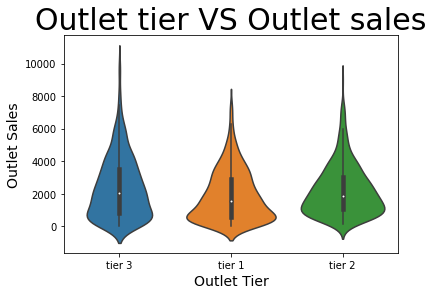

In [ ]:
#creates violin boxplot to show outlet tier vs sales
boxplot = sns.violinplot(data=df, x='Outlet_Location_Type',y='Item_Outlet_Sales')


boxplot.axes.set_title("Outlet tier VS Outlet sales", fontsize=30)
boxplot.set_ylabel("Outlet Sales", fontsize=14)
boxplot.set_xlabel("Outlet Tier", fontsize=14);